In [3]:
using Enzyme, Plots, BenchmarkTools

In [4]:
const I₀ = 1e-12 # Typical for a silicon diode

1.0e-12

In [5]:
const Vt = 25.85e-3 # At 300K

0.02585

In [6]:
Id(Vd) = I₀*(exp(Vd/Vt) - 1)

Id (generic function with 1 method)

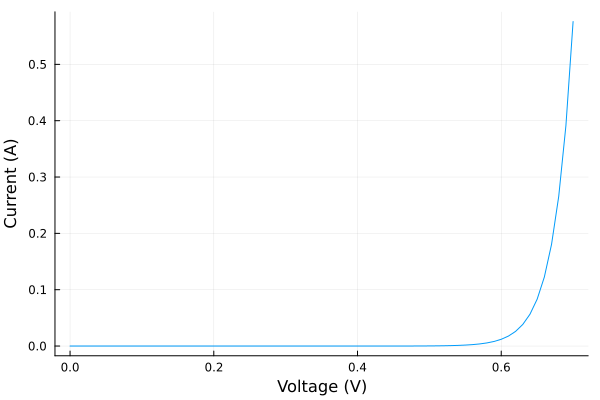

In [7]:
plot(0:0.01:0.7, Id,ylabel="Current (A)", xlabel="Voltage (V)",legend=false)

In [8]:
function Vd(Vs,R ;last_Vd=0.7, tolerance = 1e-6)
    while true
        this_Vd = Vt*log((Vs-last_Vd)/(R*I₀) + 1)
        if abs(this_Vd - last_Vd) <= tolerance
            return this_Vd
        else
            last_Vd = this_Vd
        end
    end
end

Vd (generic function with 1 method)

In [9]:
Vd(5,1e3)

0.5741473393384828

In [10]:
autodiff(Forward,R->Vd(5,R),Duplicated, Duplicated(1e3, 1.0))

(0.5741473393384828, -2.5699895040569538e-5)